In [1]:
import rasterio
# import rasterio.features
# import rasterio.warp
from matplotlib import pyplot
from rasterio.plot import show
import pandas as pd
import numpy as np

In [41]:
import glob
sg_files = glob.glob("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\Senegal_LCC\\SG_data\\*clipped.tif")

In [42]:
# open all data files with rasterio and put into an attribute table 
sg_df = pd.DataFrame()
for file in sg_files: 
    # pull the column name frome the file path
    col_name = file[71:-17]
    
    # open image using rasterio
    img = rasterio.open(file)
 
    #read image 
    array=img.read()

    #create np array
    array=np.array(array)
#     print (array)
#     print (array.reshape([1,-1]).T)
    # create a column in dataframe 
    sg_df[col_name] = array.reshape([1,-1]).T.flatten()
    

In [43]:
# then add in the DEM 
dem_img = rasterio.open("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\Senegal_LCC\\DEM\\Slope_250_goode.tif")

#read image 
array=img.read()

#create np array
array=np.array(array)

sg_df['slope'] = array.reshape([1,-1]).T.flatten()

In [44]:
sg_df.head()

,bdod_0-5cm,bdod_0-5,bdod_100-200cm,bdod_15-30cm,bdod_30-60cm,bdod_5-15cm,bdod_60-100cm,cec_0-5cm,cec_100-200cm,cec_15-30cm,...,silt_30-60cm,silt_5-15cm,silt_60-100cm,soc_0-5cm,soc_100-200cm,soc_15-30cm,soc_30-60cm,soc_5-15cm,soc_60-100cm,slope
0,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,...,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767
1,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,...,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767
2,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,...,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767
3,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,...,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767
4,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,...,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767


In [45]:
#save the data 
sg_df.to_csv("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\Senegal_LCC\\senegal_sg+DEM.csv")

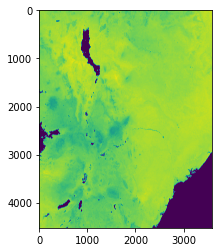

<AxesSubplot:>

In [2]:
img=rasterio.open("C:\\Tara_Fall_2019\\Kenya_Tanzania_LCC\\LCC_Project\\Soilgrids_Data\\bdod_0-5cm_mean.tif")
show(img,0)

In [3]:
#read image 
array=img.read()
#create np array
array=np.array(array)
print (img.profile)

#create pandas df
#print (array.reshape([1,-1]).T.flatten())
#dataset = pd.DataFrame(array.reshape([1,-1]).T)
#dataset.columns = ['cec_0-5']

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 3584, 'height': 4524, 'count': 1, 'crs': CRS.from_wkt('PROJCS["Interrupted_Goode_Homolosine",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Interrupted_Goode_Homolosine"],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(250.0, 0.0, 3770000.0,
       0.0, -250.0, 609000.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


In [2]:
lcc = pd.read_csv('C:\\Tara_Fall_2019\\Kenya_Tanzania_LCC\\LCC_Project\\Kenya_AWC.csv')

In [80]:
lcc[lcc['slope'] != 32767].head()

,Unnamed: 0,Unnamed: 0.1,bdod_0-5cm,bdod_0-5,bdod_100-200cm,bdod_15-30cm,bdod_30-60cm,bdod_5-15cm,bdod_60-100cm,cec_0-5cm,...,stoniness_LCC,perm_LCC,awc_LCC,lime_LCC,LCC_final,LCC_final_noawc,limitation,limitation_noawc,limitation_code,limitation_noawc_code
3881,3881,3881,150,150,153,152,152,149,152,73,...,1.0,1.0,2.0,1.0,2.0,1.0,2s-a,1e s-t s-r w-p s-l,0.0,6.0
3882,3882,3882,151,151,153,153,152,150,152,74,...,1.0,1.0,2.0,1.0,2.0,1.0,2s-a,1e s-t s-r w-p s-l,0.0,6.0
3883,3883,3883,151,151,153,153,152,150,153,88,...,1.0,1.0,2.0,1.0,2.0,1.0,2s-a,1e s-t s-r w-p s-l,0.0,6.0
3884,3884,3884,147,147,151,150,150,148,149,84,...,1.0,1.0,2.0,1.0,2.0,1.0,2s-a,1e s-t s-r w-p s-l,0.0,6.0
3885,3885,3885,136,136,149,139,146,134,147,82,...,1.0,1.0,2.0,1.0,2.0,1.0,2s-a,1e s-t s-r w-p s-l,0.0,6.0


In [77]:
lcc.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'bdod_0-5cm', 'bdod_0-5',
       'bdod_100-200cm', 'bdod_15-30cm', 'bdod_30-60cm', 'bdod_5-15cm',
       'bdod_60-100cm', 'cec_0-5cm', 'cec_100-200cm', 'cec_15-30cm',
       'cec_30-60cm', 'cec_5-15cm', 'cec_60-100cm', 'cfvo_0-5cm',
       'cfvo_100-200cm', 'cfvo_15-30cm', 'cfvo_30-60cm', 'cfvo_5-15cm',
       'cfvo_60-100cm', 'clay_0-5cm', 'clay_100-200cm', 'clay_15-30cm',
       'clay_30-60cm', 'clay_5-15cm', 'clay_60-100cm', 'nitrogen_0-5cm',
       'nitrogen_100-200cm', 'nitrogen_15-30cm', 'nitrogen_30-60cm',
       'nitrogen_5-15cm', 'nitrogen_60-100cm', 'phh2o_0-5cm',
       'phh2o_100-200cm', 'phh2o_15-30cm', 'phh2o_30-60cm', 'phh2o_5-15cm',
       'phh2o_60-100cm', 'sand_0-5cm', 'sand_100-200cm', 'sand_15-30cm',
       'sand_30-60cm', 'sand_5-15cm', 'sand_60-100cm', 'silt_0-5cm',
       'silt_100-200cm', 'silt_15-30cm', 'silt_30-60cm', 'silt_5-15cm',
       'silt_60-100cm', 'soc_0-5cm', 'soc_100-200cm', 'soc_15-30cm',
       'soc_30-60cm', '

In [3]:
src=rasterio.open("C:\\Tara_Fall_2019\\Kenya_Tanzania_LCC\\LCC_Project\\Soilgrids_Data\\bdod_0-5cm_mean.tif")
print (src.profile)

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 3584, 'height': 4524, 'count': 1, 'crs': CRS.from_wkt('PROJCS["Interrupted_Goode_Homolosine",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Interrupted_Goode_Homolosine"],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(250.0, 0.0, 3770000.0,
       0.0, -250.0, 609000.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


In [4]:
cols = ['awc1', 'awc2', 'awc3', 'awc4', 'awc5',
       'awc_total']
# ['surface_texture',
#        'top_texture', 'awc1', 'awc2', 'awc3', 'awc4', 'awc5', 'awc6',
#        'awc_total', 'erosion_risk_LCC', 'soil_tex_LCC', 'stoniness_LCC',
#        'perm_LCC', 'awc_LCC', 'lime_LCC', 'LCC_final', 'LCC_final_noawc',
#        'limitation', 'limitation_noawc']
for col in cols: 
    # pull the column name frome the file path
    data_array = np.reshape(np.array(lcc[col]), (1, 4524, 3584))
    with rasterio.Env():

        # Write an array as a raster band to a new 8-bit file. For
        # the new file's profile, we start with the profile of the source
        profile = src.profile

        # And then change the band count to 1, set the
        # dtype to uint8, and specify LZW compression.
        profile.update(
            dtype=rasterio.float32,
            count=1,
            compress='lzw')
        
        output = "C:\\Tara_Fall_2019\\Kenya_Tanzania_LCC\\LCC_Project\\Soilgrids_Data\\" + col + ".tif"

        with rasterio.open(output, 'w', **profile) as dst:
            dst.write(data_array.astype(rasterio.float32))